In [1]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from common import *
from ViT import ViT, ViT_Extractor
from GaitData import GaitData
from sklearn.decomposition import PCA

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_classes = len(TRAIN_LABEL)
ViT_model = ViT(img_size=64,
            in_chanels=1,
            patch_size=32,
            embed_dim=512,
            num_encoders=6,
            num_heads=8,
            hidden_dim=1024,
            dropout=0.2,
            num_classes=num_classes)

ViT_model.load_state_dict(torch.load('GaitViT_model.pth'))
model = ViT_Extractor(ViT_model).to(device)

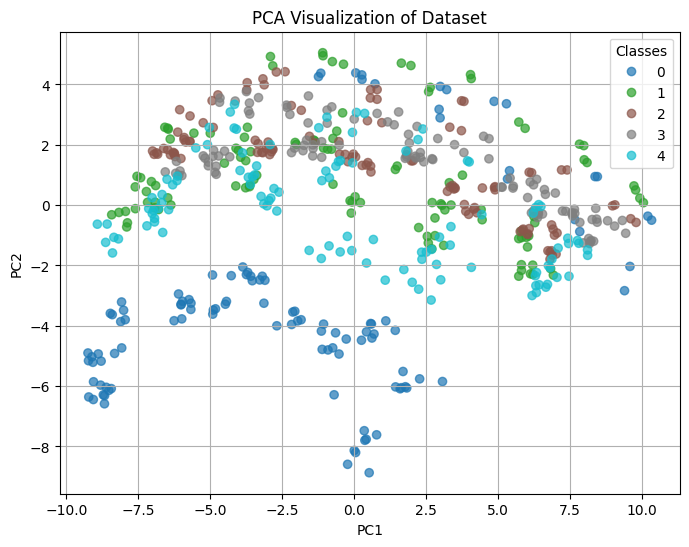

In [3]:
raw_data = GaitData('GEI.pt', TEST_LABEL_VIS, map_label=MAP_TEST_LABEL)
raw_loader = DataLoader(raw_data, batch_size=len(raw_data), shuffle=False)
all_images = []
all_labels = []

for imgs, labels in raw_loader:
    all_images.append(imgs)
    all_labels.append(labels)

X = torch.cat(all_images, dim=0)
y = torch.cat(all_labels, dim=0)
X_flat = X.view(X.size(0), -1)
X_np = X_flat.numpy()
y_np = y.numpy()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_np)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_np, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title("PCA Visualization of Dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

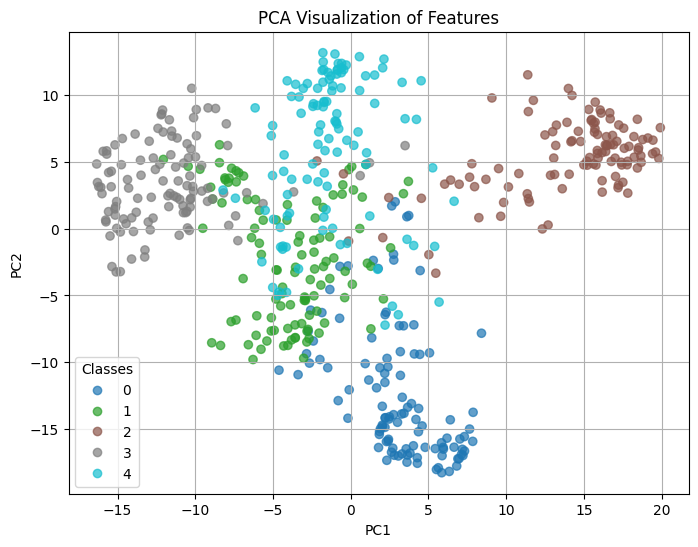

In [4]:
features = []
labels = []

model.eval()
with torch.no_grad():
    for imgs, lbls in raw_loader:
        imgs = imgs.to(device) 
        outputs = model(imgs)  
        features.append(outputs.cpu())
        labels.append(lbls)

X_feat = torch.cat(features, dim=0)
y_feat = torch.cat(labels, dim=0)
X_np = X_feat.view(X_feat.size(0), -1).numpy()
y_np = y_feat.numpy()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_np)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_np, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title("PCA Visualization of Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()